In [1]:
!pip install -q darts

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install -q matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.15.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt
import datetime

In [4]:
value = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df = pd.DataFrame({'time':pd.date_range('20210101', periods=20), 'value': value})
df.head()

,time,value
0,2021-01-01,1
1,2021-01-02,2
2,2021-01-03,3
3,2021-01-04,4
4,2021-01-05,5


In [5]:
series = TimeSeries.from_dataframe(df,'time','value')

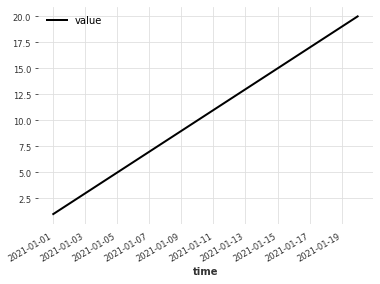

In [6]:
series.plot()

In [7]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20210115'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [8]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=2,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='univariate',
    log_tensorboard=True,
    random_state=42,
    training_length=5,
    input_chunk_length=4,
    force_reset=True
)

In [9]:
my_model.fit(train_transformed,
             verbose=True)

[2022-01-06 18:01:26,696] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-01-06 18:01:26,696] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-01-06 18:01:26,705] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-06 18:01:26,705] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 6/500 [00:00<00:17, 28.56it/s]

  3%|▎         | 15/500 [00:00<00:17, 27.80it/s]

  5%|▌         | 25/500 [00:00<00:16, 29.32it/s]

  7%|▋         | 35/500 [00:01<00:16, 28.39it/s]

  9%|▉         | 45/500 [00:01<00:15, 29.70it/s]

 11%|█         | 56/500 [00:01<00:15, 29.31it/s]

 13%|█▎        | 66/500 [00:02<00:14, 29.09it/s]

 15%|█▌        | 76/500 [00:02<00:14, 29.80it/s]

 17%|█▋        | 85/500 [00:02<00:14, 28.74it/s]

 19%|█▉        | 96/500 [00:03<00:13, 29.70it/s]

 21%|██        | 106/500 [00:03<00:13, 29.62it/s]

 23%|██▎       | 116/500 [00:03<00:12, 29.82it/s]

 25%|██▌       | 126/500 [00:04<00:12, 30.12it/s]

 27%|██▋       | 136/500 [00:04<00:12, 29.22it/s]

 29%|██▉       | 146/500 [00:05<00:11, 29.72it/s]

 31%|███       | 156/500 [00:05<00:11, 29.54it/s]

 33%|███▎      | 167/500 [00:05<00:11, 29.79it/s]

 35%|███▌      | 175/500 [00:05<00:10, 29.71it/s]

 37%|███▋      | 184/500 [00:06<00:10, 29.60it/s]

 39%|███▉      | 196/500 [00:06<00:09, 30.85it/s]

 41%|████      | 204/500 [00:06<00:09, 30.92it/s]

 43%|████▎     | 215/500 [00:07<00:09, 29.30it/s]

 45%|████▌     | 225/500 [00:07<00:09, 29.75it/s]

 47%|████▋     | 235/500 [00:08<00:08, 30.25it/s]

 49%|████▉     | 246/500 [00:08<00:08, 28.73it/s]

 51%|█████▏    | 257/500 [00:08<00:08, 30.18it/s]

 53%|█████▎    | 265/500 [00:09<00:07, 30.56it/s]

 55%|█████▌    | 277/500 [00:09<00:07, 30.21it/s]

 57%|█████▋    | 285/500 [00:09<00:06, 30.96it/s]

 59%|█████▉    | 297/500 [00:10<00:06, 30.94it/s]

 61%|██████    | 305/500 [00:10<00:06, 30.29it/s]

 63%|██████▎   | 317/500 [00:10<00:05, 31.07it/s]

 65%|██████▌   | 325/500 [00:10<00:05, 30.84it/s]

 67%|██████▋   | 337/500 [00:11<00:05, 31.15it/s]

 69%|██████▉   | 345/500 [00:11<00:04, 31.06it/s]

 71%|███████▏  | 357/500 [00:11<00:04, 31.72it/s]

 73%|███████▎  | 365/500 [00:12<00:04, 30.82it/s]

 75%|███████▌  | 377/500 [00:12<00:04, 30.26it/s]

 77%|███████▋  | 385/500 [00:12<00:03, 31.06it/s]

 79%|███████▊  | 393/500 [00:13<00:03, 30.78it/s]

 81%|████████  | 405/500 [00:13<00:03, 29.97it/s]

 83%|████████▎ | 417/500 [00:13<00:02, 31.36it/s]

 85%|████████▌ | 425/500 [00:14<00:02, 31.85it/s]

 87%|████████▋ | 437/500 [00:14<00:02, 30.87it/s]

 89%|████████▉ | 445/500 [00:14<00:01, 31.95it/s]

 91%|█████████▏| 457/500 [00:15<00:01, 31.79it/s]

 93%|█████████▎| 465/500 [00:15<00:01, 31.17it/s]

 95%|█████████▌| 477/500 [00:15<00:00, 32.24it/s]

 97%|█████████▋| 485/500 [00:16<00:00, 32.22it/s]

 99%|█████████▉| 497/500 [00:16<00:00, 31.19it/s]

100%|██████████| 500/500 [00:16<00:00, 30.14it/s]


In [10]:
predicted = my_model.predict(n=len(val_transformed))

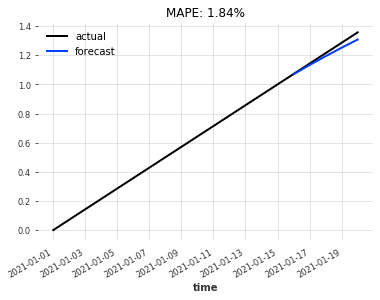

In [11]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()

In [12]:
transformer.inverse_transform(predicted)

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[15.97857629]],

       [[16.86660488]],

       [[17.70804743]],

       [[18.52473009]],

       [[19.31361575]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-01-16 2021-01-17 ... 2021-01-20
  * component  (component) object 'value'
Dimensions without coordinates: sample